In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [2]:
N = 10  # number of experimental samples 

In [3]:
def rv():
    """Generate random variate"""
    samples = ss.norm.rvs(size=N)
    mean_est = sum(samples)/N
    sigma_parent_est = np.sqrt(sum((samples-mean_est)**2)/(N-1))
    return mean_est / (sigma_parent_est / np.sqrt(N))

In [4]:
nsamp_of_rv = 10000
rvs = [rv() for _ in range(nsamp_of_rv)]

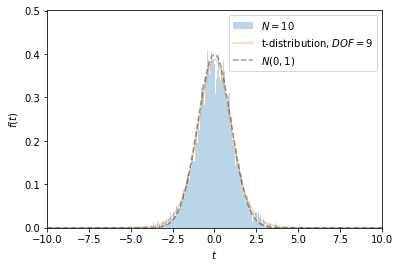

In [5]:
x_max = 10  # plots will range from -x_max to x_max
plt.hist(rvs, bins=np.linspace(-x_max, x_max, 500), alpha=0.3, density=True, label=f"${N=}$");
ax = plt.gca()
xs = np.linspace(-x_max, x_max, 1000)
# add theoretical t-distribution:
ax.plot(xs, ss.t.pdf(xs, df=N-1),label=f"t-distribution, $DOF={N-1}$", alpha=0.4)
# add normal distribution:
ax.plot(xs, 1.0 / np.sqrt(2 * np.pi) * np.exp(-0.5 * xs**2), label="$N(0,1)$", alpha=0.4, linestyle="dashed", color="black")
ax.legend()
ax = plt.gca()
ax.set_xlim([-x_max, x_max]);
ax.set_xlabel("$t$");
ax.set_ylabel("$f(t)$");